In [2]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

from collections import Counter

data = pd.read_csv("spotify-2023.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data['streams'] = data['streams'].str.replace(',', '', regex=True)
data['streams (int)'] = pd.to_numeric(data['streams'], errors='coerce')

def myfilter(x):
    return list(map(lambda x: x.strip(), str(x).replace("Tyler, The Creator","Tyler - The Creator").split(',')))
    
artists = data['artist(s)_name'].apply(myfilter)


#artists = artists[artists.apply(lambda x : len(x) == 1)]

fart = set()
for i in artists:
    for j in i:
        if j.strip() != '':
            fart.add(j.strip())
print(len(fart))
fart

697


{'(G)I-DLE',
 '070 Shake',
 '21 Savage',
 '24kgoldn',
 '2Pac',
 '347aidan',
 '4*TOWN (From Disney and Pixar���s Turning Red)',
 '50 Cent',
 'A Boogie Wit da Hoodie',
 'A$AP Rocky',
 'ACRAZE',
 'AP Dhillon',
 'ARIZONATEARS',
 "AX'EL",
 'Abhijay Sharma',
 'Abhir Hathi',
 'Adassa',
 'Adele',
 'Aerosmith',
 'AgroPlay',
 'Agust D',
 'Aitana',
 'Aitch',
 'Ak4:20',
 'Alec Benjamin',
 'Alejo',
 'Alesso',
 'Ali Sethi',
 'Alicia Keys',
 'Altamash Faridi',
 'Alvaro Diaz',
 'Amaarae',
 'Amanda Reifer',
 'Amitabh Bhattacharya',
 'Amitabha Bhattacharya',
 'Ana Castela',
 'Anderson .Paak',
 'Andy Williams',
 'Angela Aguilar',
 'Anggi Marito',
 'Anitta',
 'Anne-Marie',
 'AnnenMayKantereit',
 'Anuel Aa',
 'Aqua',
 'Arcane',
 'Arcangel',
 'Arctic Monkeys',
 'Ariana Grande',
 'Arijit Singh',
 'Armani White',
 'Ava',
 'Aventura',
 'Avicii',
 'Ayparia',
 'B. Swanson Quartet',
 'BIGBANG',
 'BL',
 'BLACKPINK',
 'BLESSD',
 'BTS',
 'BYOR',
 'Baby Keem',
 'Baby Rasta',
 'Baby Tate',
 'Bad B',
 'Bad Bunny',
 'Ba

In [74]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [64]:
# Step 1: Split artist names into individual entries
data['artist_list'] = data['artist(s)_name'].apply(myfilter)

# Step 2: Flatten the list of artists and count occurrences
all_artists = [artist.strip() for artists in data['artist_list'] for artist in artists]
artist_counts = Counter(all_artists)

# Step 3: Find the top 10 artists with the most songs
top_10_artists = artist_counts.most_common(10)

# Step 4: Convert to a DataFrame for display
top_10_df = pd.DataFrame(top_10_artists, columns=['Artist', 'Song_Count'])

print(top_10_df)

           Artist  Song_Count
0       Bad Bunny          40
1    Taylor Swift          38
2      The Weeknd          37
3             SZA          23
4  Kendrick Lamar          23
5            Feid          21
6           Drake          19
7    Harry Styles          17
8      Peso Pluma          16
9       21 Savage          14


In [65]:
target_artists = top_10_df["Artist"].values
artists = data["artist_list"][data["artist_list"].apply(lambda x: any([artist in target_artists for artist in x]))]

print(artists[artists.apply(lambda x: "Bad Bunny" in x)])

# artists = artists[artists.apply(lambda x : len(x) > 1)]

te = TransactionEncoder()
te_data = te.fit(artists).transform(artists)

encoded_data = pd.DataFrame(te_data, columns=te.columns_)
frequent_itemsets = apriori(encoded_data, min_support=0.001, use_colnames=True)

print(frequent_itemsets)

4                              [Bad Bunny]
10             [Bad Bunny, Grupo Frontera]
27                      [Tainy, Bad Bunny]
87           [Chencho Corleone, Bad Bunny]
92             [Bad Bunny, Eladio Carrion]
192                            [Bad Bunny]
217                  [Arcangel, Bad Bunny]
239                            [Bad Bunny]
291                [Nengo Flow, Bad Bunny]
332                  [Gorillaz, Bad Bunny]
362                            [Bad Bunny]
368                  [J Balvin, Bad Bunny]
377                            [Bad Bunny]
422                            [Bad Bunny]
490               [Bad Bunny, Jhay Cortez]
494            [Bad Bunny, Rauw Alejandro]
528    [Julieta Venegas, Bad Bunny, Tainy]
547                  [Aventura, Bad Bunny]
555               [Bad Bunny, Jhay Cortez]
570                [Sech, Bad Bunny, Mora]
632      [J Balvin, Nio Garcia, Bad Bunny]
676                            [Bad Bunny]
696              [Daddy Yankee, Bad Bunny]
716        

In [68]:
rules = association_rules(df=frequent_itemsets, metric="confidence", min_threshold=0.5, num_itemsets=1)

filtered_rules = rules[(rules['antecedents'].map(len) > 1) & 
                       (rules['consequents'].map(len) == 1)]

filtered_rules = filtered_rules.sort_values(by=['confidence', 'lift', 'leverage'], ascending=False, inplace=False)

filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
159,"(21 Savage, Tyler - The Creator)",(Pharrell Williams),0.004219,0.004219,0.004219,1.0,237.000000,1.0,0.004202,inf,1.000000,1.000000,1.000000,1.000000
164,"(Alejo, Feid)",(Robi),0.004219,0.004219,0.004219,1.0,237.000000,1.0,0.004202,inf,1.000000,1.000000,1.000000,1.000000
166,"(Feid, Robi)",(Alejo),0.004219,0.004219,0.004219,1.0,237.000000,1.0,0.004202,inf,1.000000,1.000000,1.000000,1.000000
170,"(Amanda Reifer, Kendrick Lamar)",(Blxst),0.004219,0.004219,0.004219,1.0,237.000000,1.0,0.004202,inf,1.000000,1.000000,1.000000,1.000000
171,"(Kendrick Lamar, Blxst)",(Amanda Reifer),0.004219,0.004219,0.004219,1.0,237.000000,1.0,0.004202,inf,1.000000,1.000000,1.000000,1.000000
192,"(DJ Khaled, Drake)",(Lil Baby),0.004219,0.004219,0.004219,1.0,237.000000,1.0,0.004202,inf,1.000000,1.000000,1.000000,1.000000
193,"(Lil Baby, Drake)",(DJ Khaled),0.004219,0.004219,0.004219,1.0,237.000000,1.0,0.004202,inf,1.000000,1.000000,1.000000,1.000000
196,"(Feid, De La Ghetto)",(Pailita),0.004219,0.004219,0.004219,1.0,237.000000,1.0,0.004202,inf,1.000000,1.000000,1.000000,1.000000
197,"(Feid, Pailita)",(De La Ghetto),0.004219,0.004219,0.004219,1.0,237.000000,1.0,0.004202,inf,1.000000,1.000000,1.000000,1.000000
201,"(Feid, Paloma Mami)",(De La Ghetto),0.004219,0.004219,0.004219,1.0,237.000000,1.0,0.004202,inf,1.000000,1.000000,1.000000,1.000000


In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('spotify-2023.csv')

# Select features for clustering
features = ['bpm', 'danceability_%', 'energy_%', 'valence_%', 
            'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
features = ['']

# Drop missing values for the selected features
data = data.dropna(subset=features)

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data[features])

# Determine optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with the optimal number of clusters
optimal_k = 4  # Adjust based on the Elbow Curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)
data['PCA1'] = reduced_features[:, 0]
data['PCA2'] = reduced_features[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of Songs (Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Display cluster feature summary
cluster_summary = data.groupby('Cluster')[features].mean()
print(cluster_summary)


KeyError: ['']

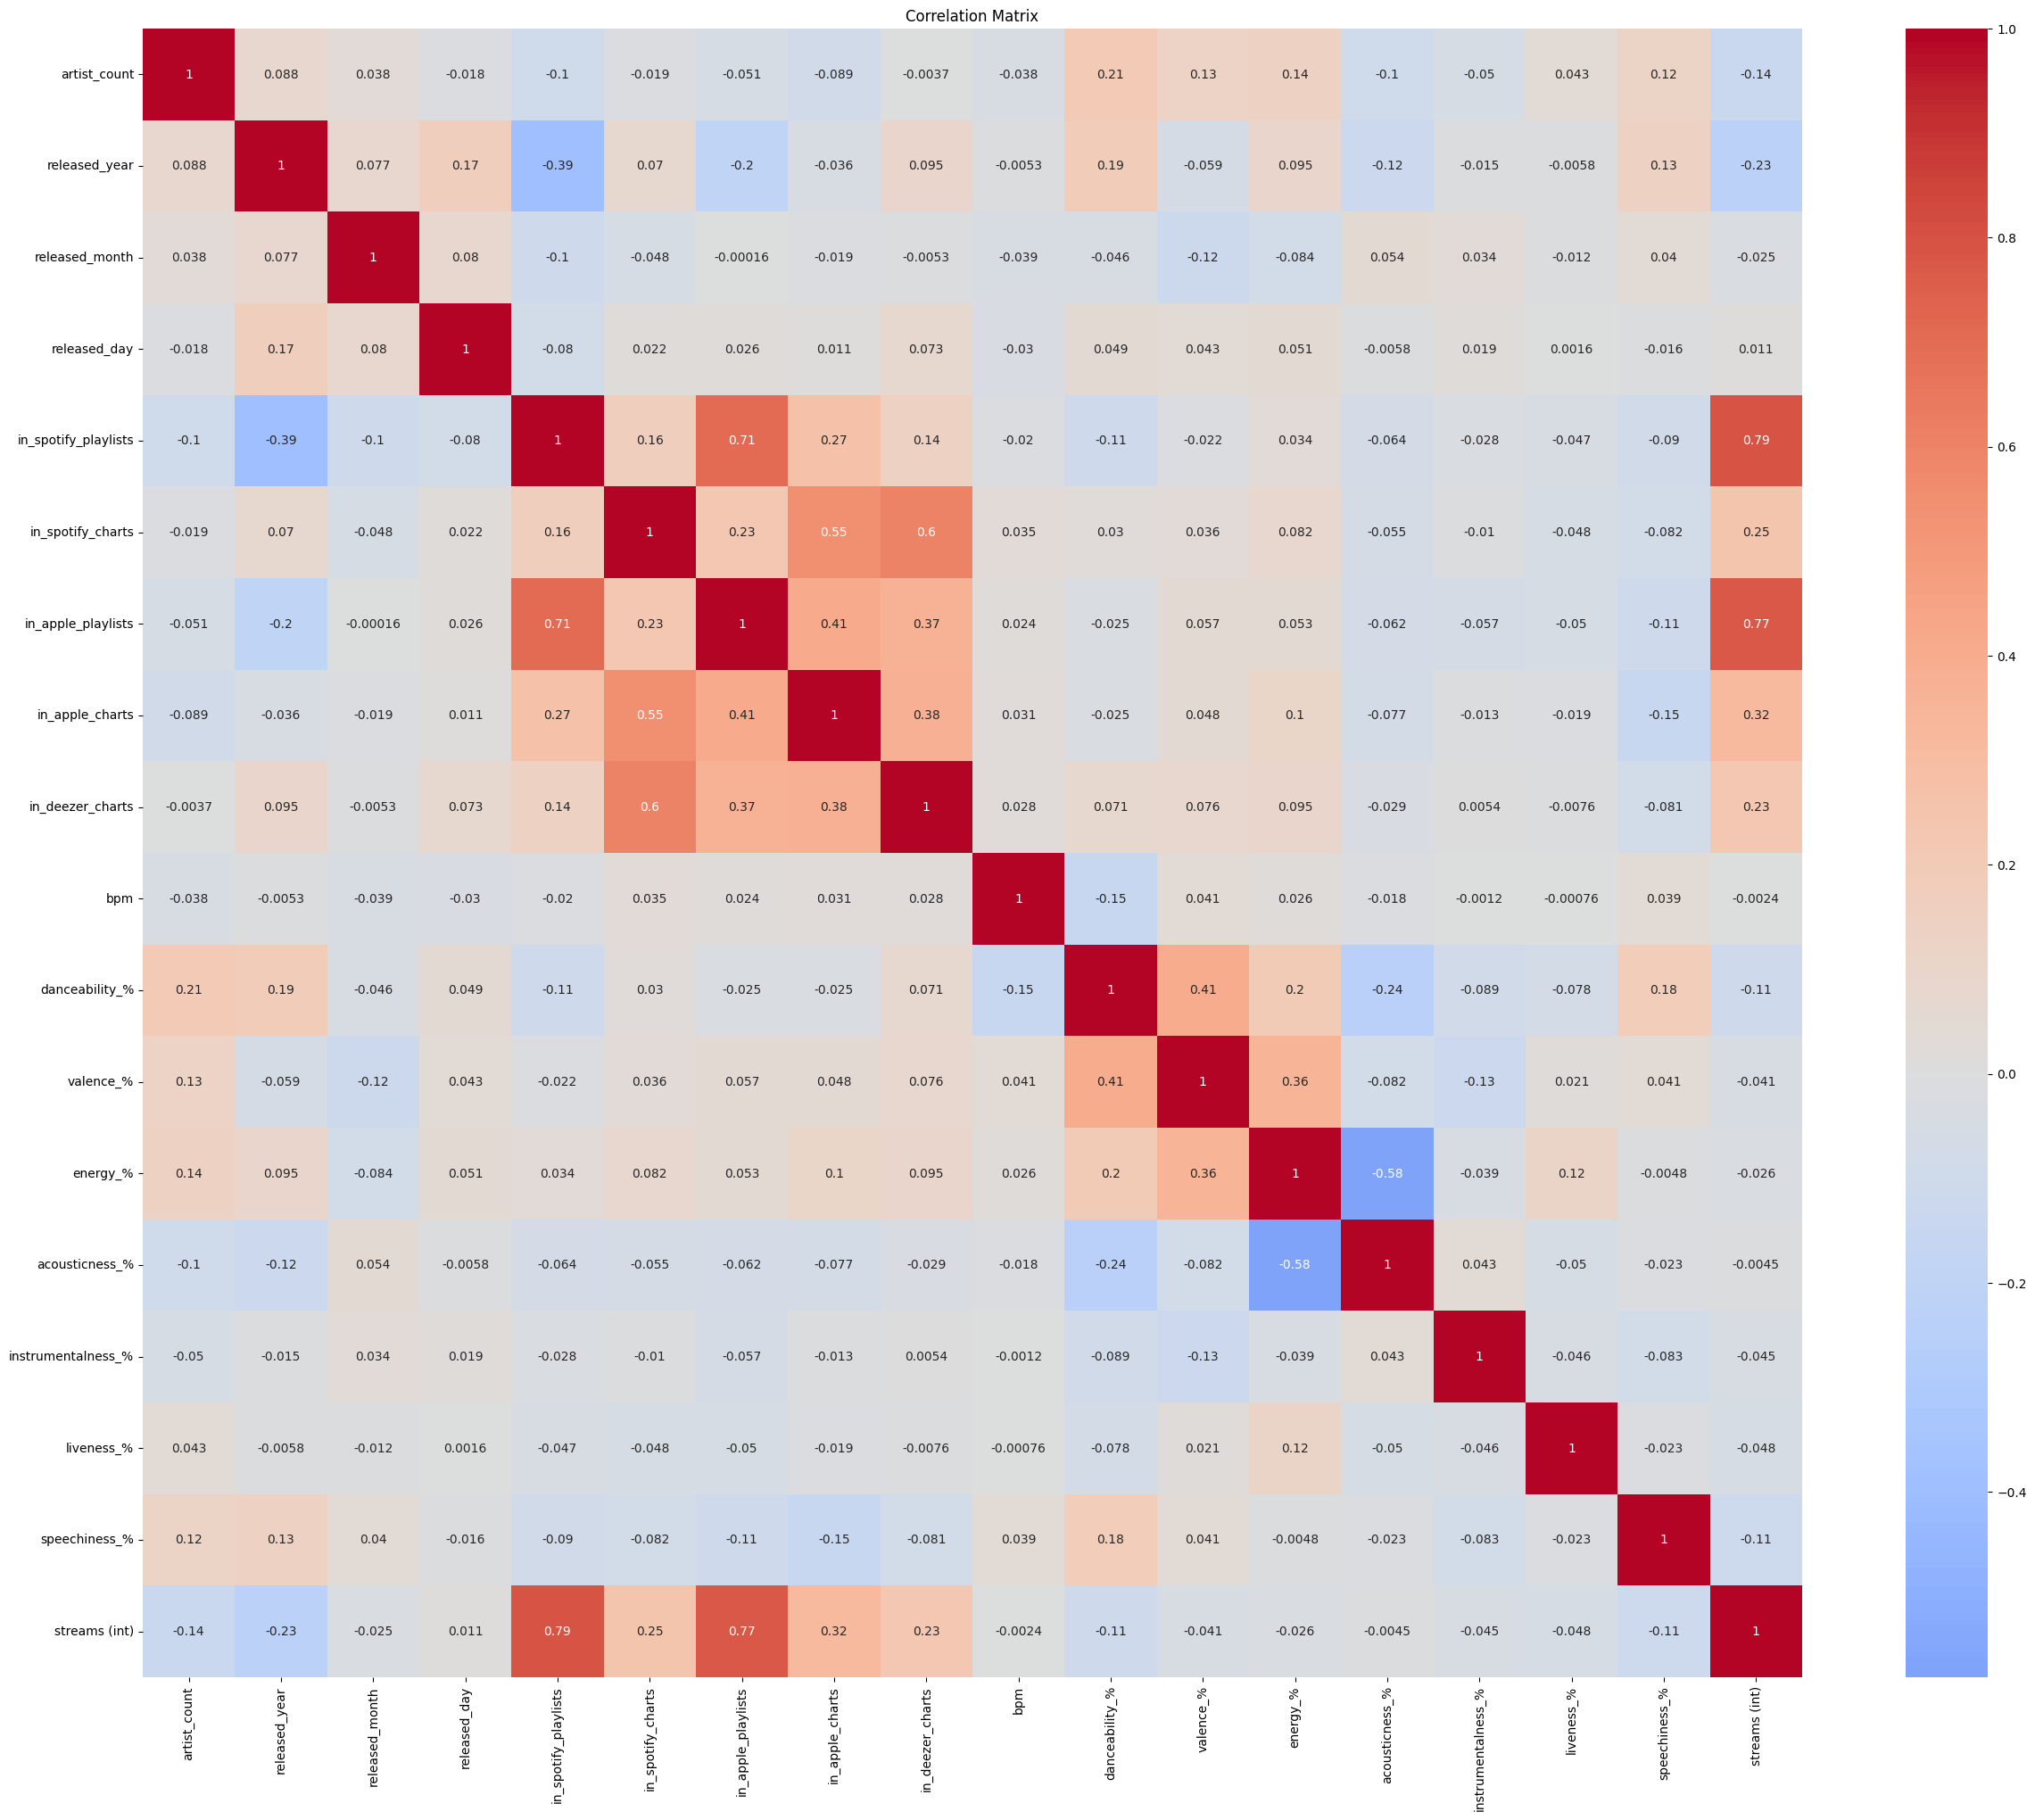

In [3]:
# Correlation Matrix ( Numeric Only )
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=np.array((10, 8)) * 3)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [26]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).head(20))

in_spotify_playlists  in_apple_playlists    0.708277
in_spotify_charts     in_deezer_charts      0.600205
                      in_apple_charts       0.552232
in_apple_playlists    in_apple_charts       0.414523
danceability_%        valence_%             0.408451
in_apple_charts       in_deezer_charts      0.383668
in_apple_playlists    in_deezer_charts      0.369032
valence_%             energy_%              0.357612
in_spotify_playlists  in_apple_charts       0.271317
in_spotify_charts     in_apple_playlists    0.233354
artist_count          danceability_%        0.207027
danceability_%        energy_%              0.198095
released_year         danceability_%        0.187333
danceability_%        speechiness_%         0.184977
released_year         released_day          0.174282
in_spotify_playlists  in_spotify_charts     0.164331
                      in_deezer_charts      0.144342
artist_count          energy_%              0.137096
released_year         speechiness_%         0.

In [5]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).tail(10))

in_apple_playlists  speechiness_%          -0.108011
released_month      valence_%              -0.118571
released_year       acousticness_%         -0.124156
valence_%           instrumentalness_%     -0.132890
bpm                 danceability_%         -0.147095
in_apple_charts     speechiness_%          -0.151539
released_year       in_apple_playlists     -0.198998
danceability_%      acousticness_%         -0.236165
released_year       in_spotify_playlists   -0.392204
energy_%            acousticness_%         -0.577344
dtype: float64

In [6]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix to convert it into a series and drop NaN values
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).head(10)
inv_sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).tail(10)

top_pairs = [pair for pair in sorted_pairs.index]
inv_top_pairs = [pair for pair in inv_sorted_pairs.index]

to_analyze = []
to_analyze.extend(sorted_pairs.index)
to_analyze.extend(inv_sorted_pairs.index)

to_analyze

[('streams (int)', 'in_spotify_playlists'),
 ('streams (int)', 'in_apple_playlists'),
 ('in_apple_playlists', 'in_spotify_playlists'),
 ('in_deezer_charts', 'in_spotify_charts'),
 ('in_apple_charts', 'in_spotify_charts'),
 ('in_apple_charts', 'in_apple_playlists'),
 ('valence_%', 'danceability_%'),
 ('in_deezer_charts', 'in_apple_charts'),
 ('in_deezer_charts', 'in_apple_playlists'),
 ('energy_%', 'valence_%'),
 ('acousticness_%', 'released_year'),
 ('instrumentalness_%', 'valence_%'),
 ('streams (int)', 'artist_count'),
 ('danceability_%', 'bpm'),
 ('speechiness_%', 'in_apple_charts'),
 ('in_apple_playlists', 'released_year'),
 ('streams (int)', 'released_year'),
 ('acousticness_%', 'danceability_%'),
 ('in_spotify_playlists', 'released_year'),
 ('acousticness_%', 'energy_%')]

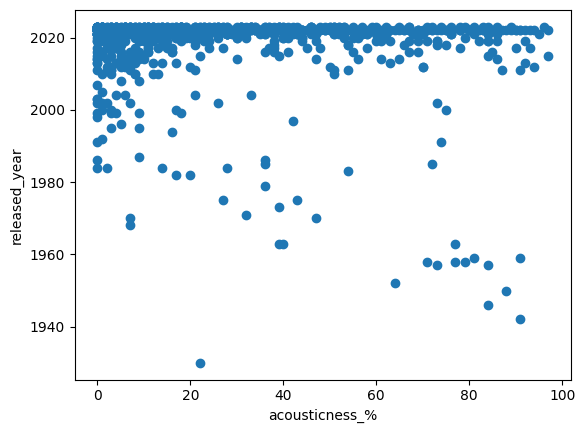

<Figure size 800x600 with 0 Axes>

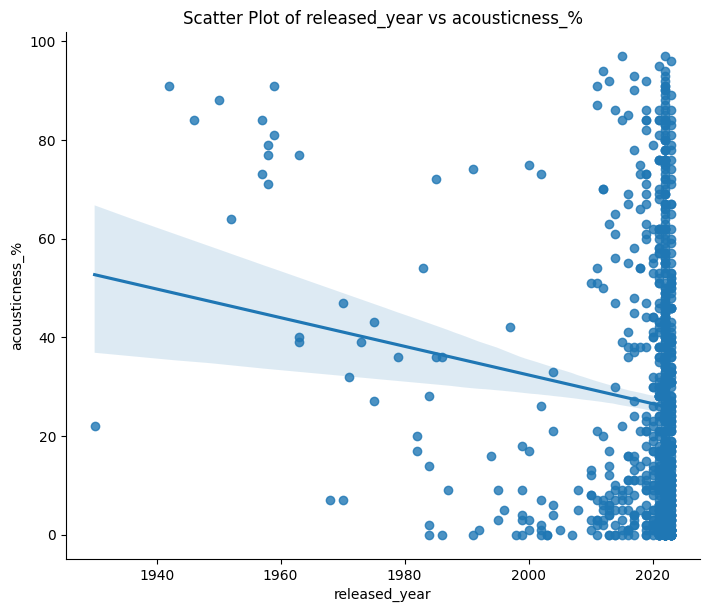

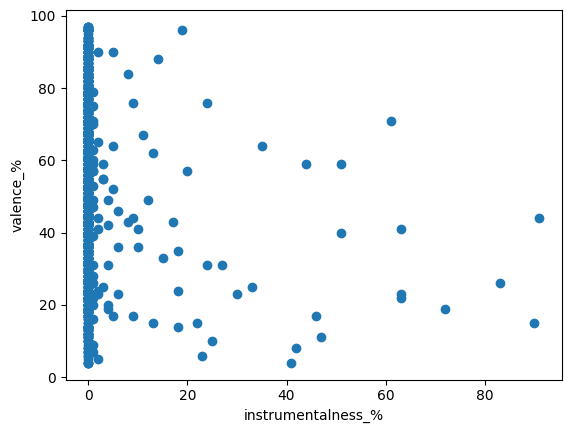

<Figure size 800x600 with 0 Axes>

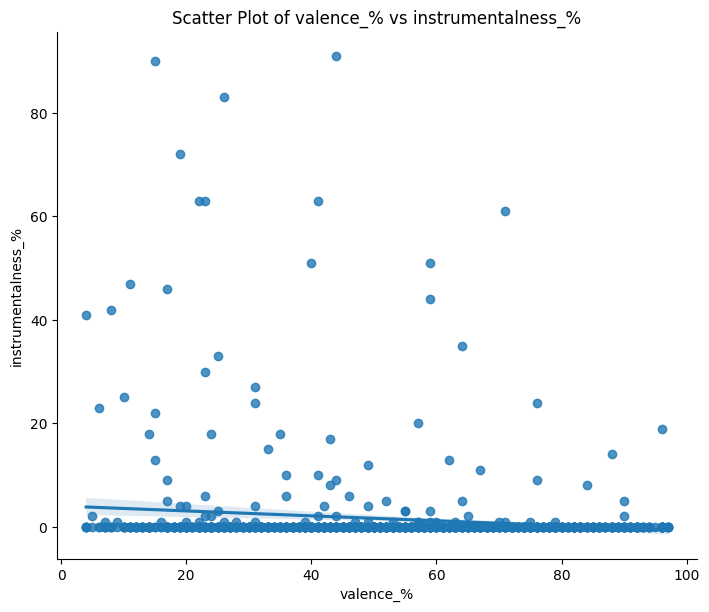

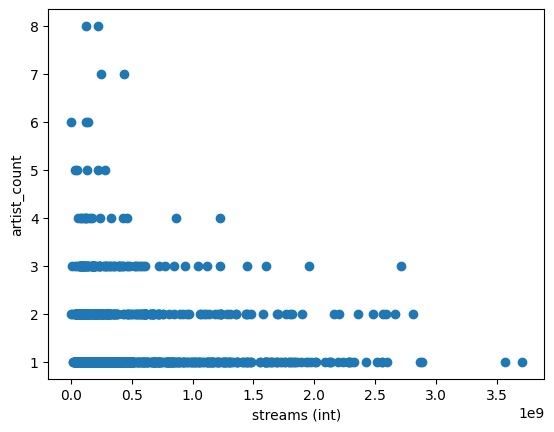

<Figure size 800x600 with 0 Axes>

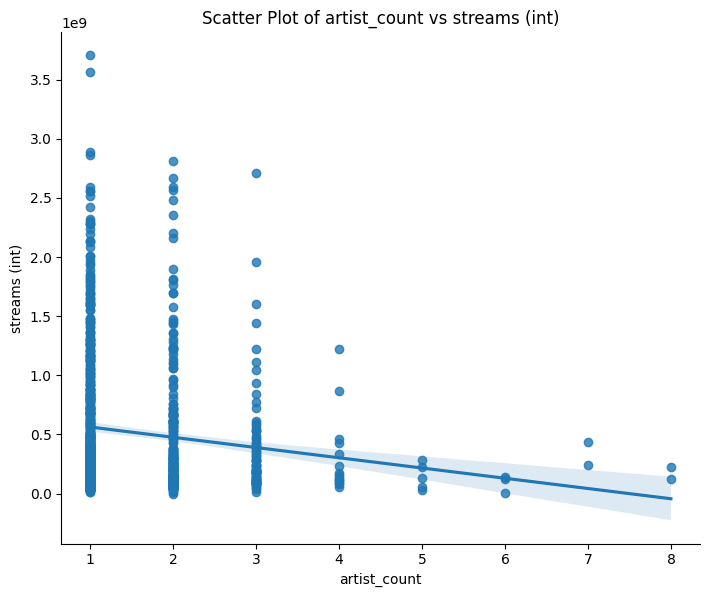

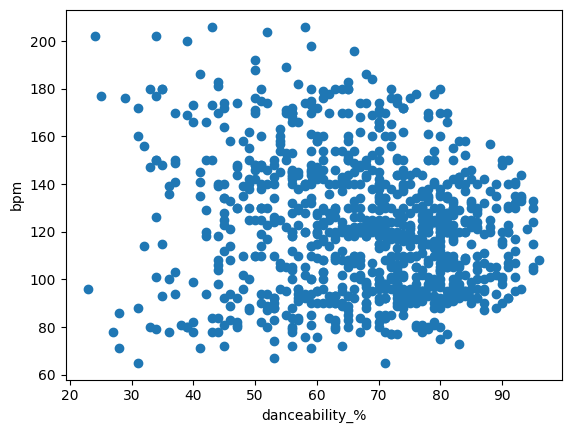

<Figure size 800x600 with 0 Axes>

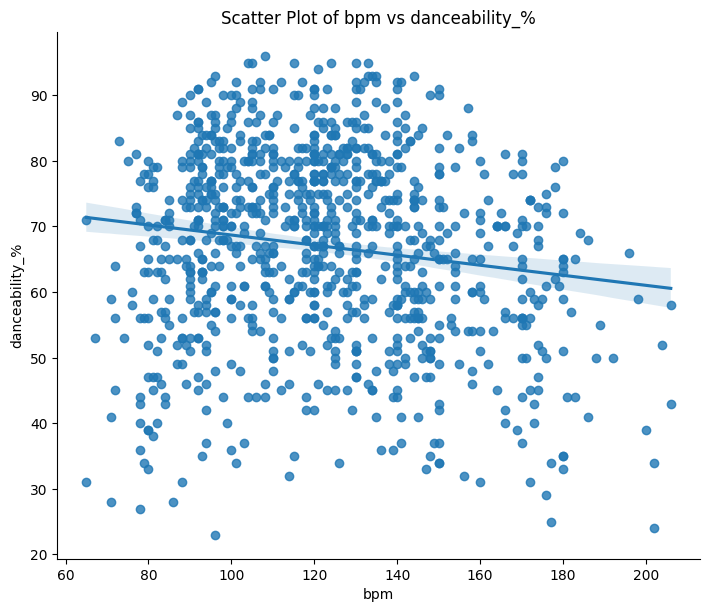

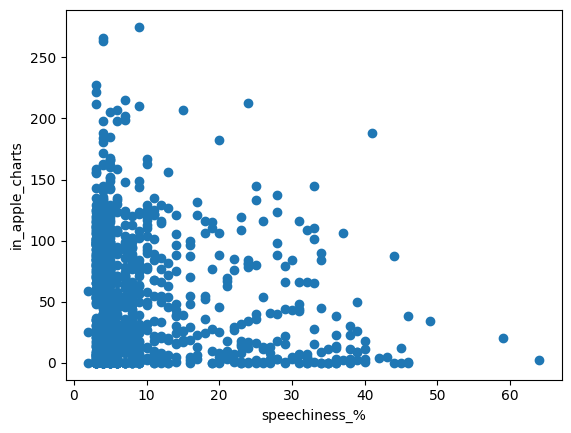

<Figure size 800x600 with 0 Axes>

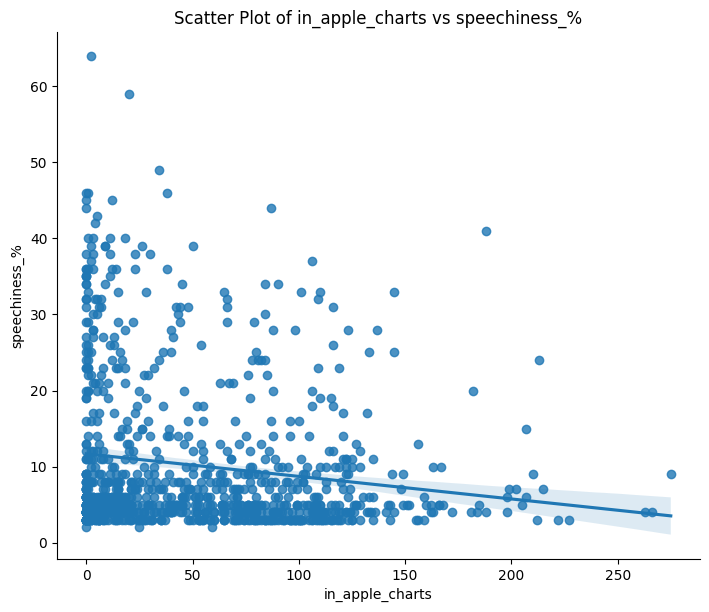

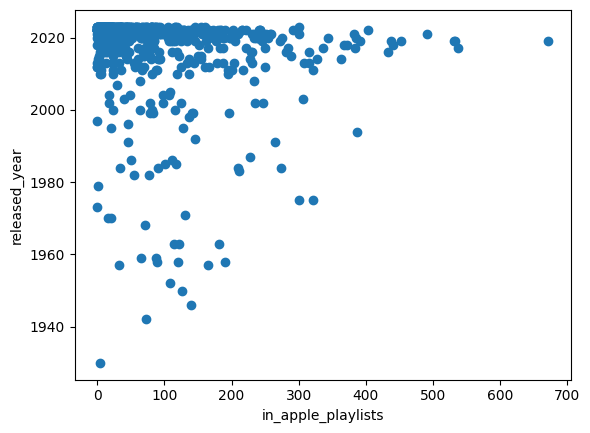

<Figure size 800x600 with 0 Axes>

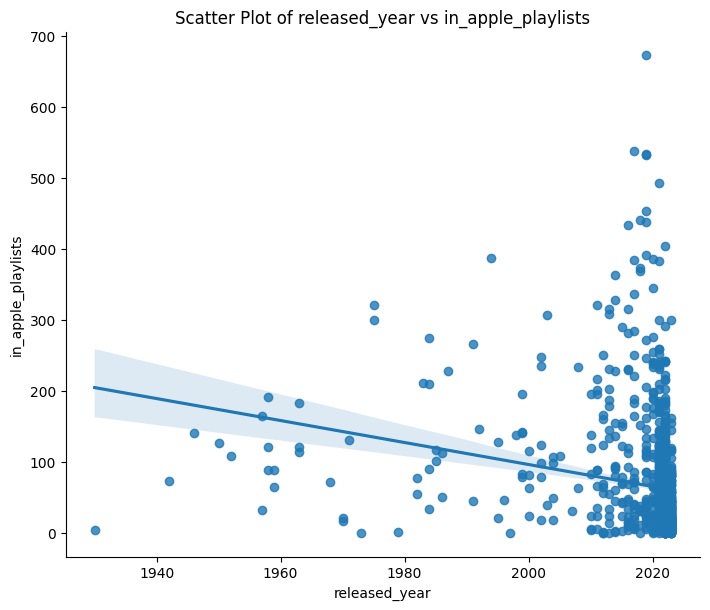

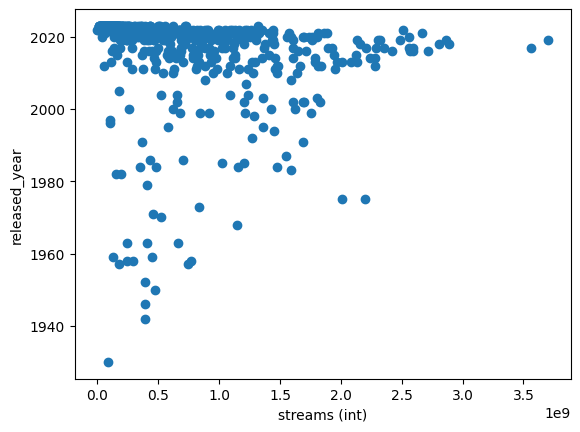

<Figure size 800x600 with 0 Axes>

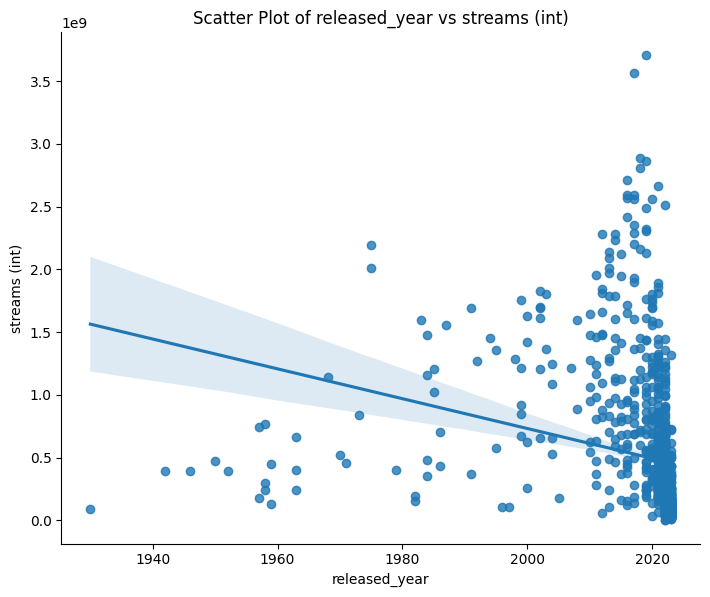

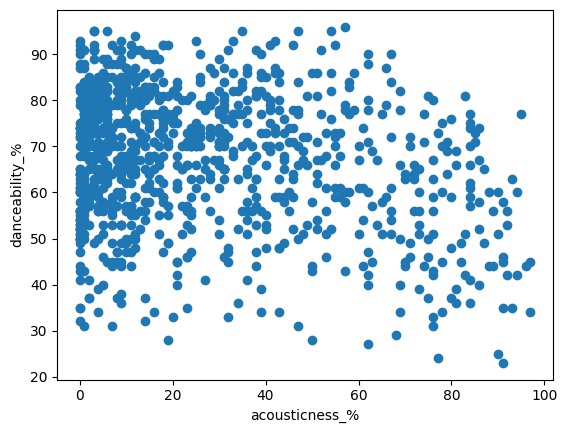

<Figure size 800x600 with 0 Axes>

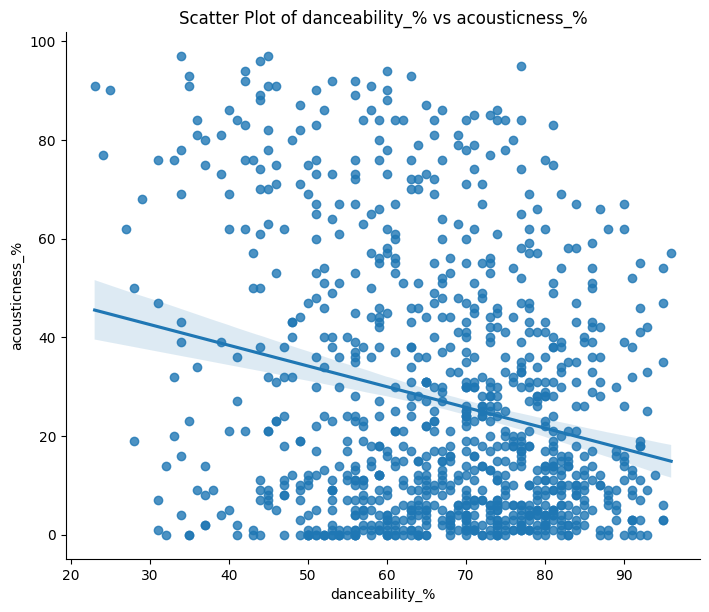

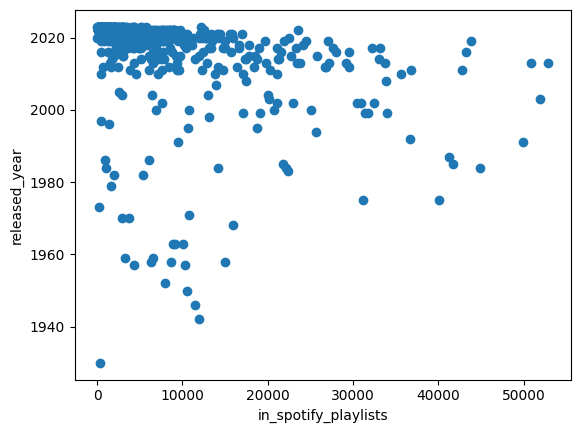

<Figure size 800x600 with 0 Axes>

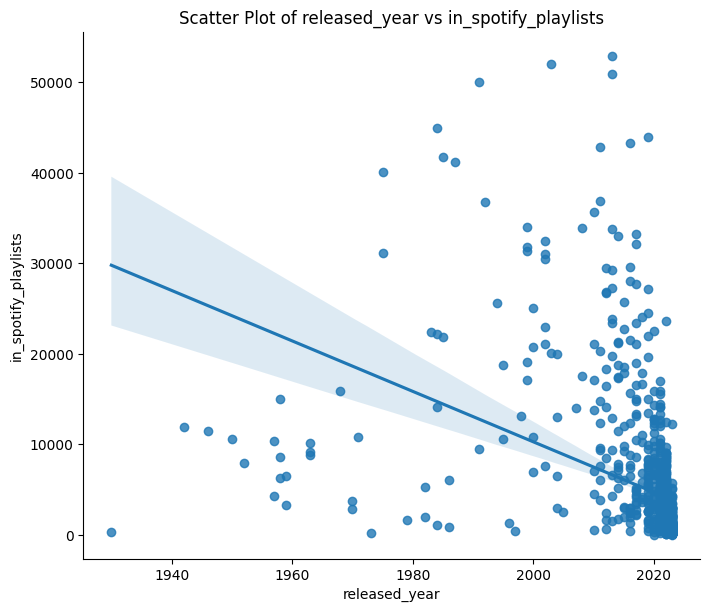

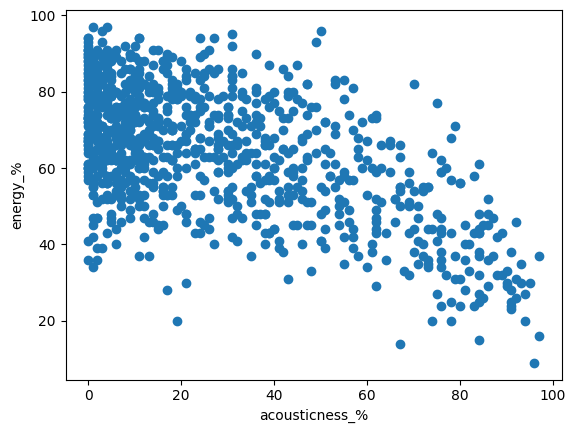

<Figure size 800x600 with 0 Axes>

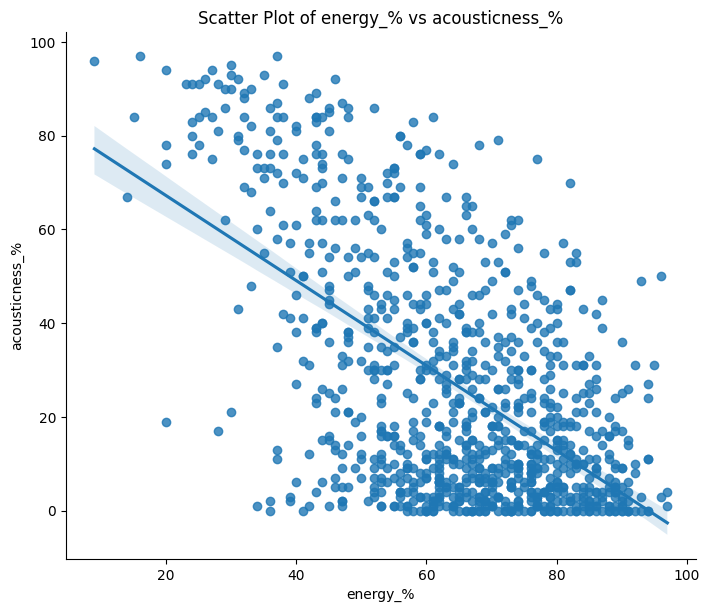

In [8]:
for (var2, var1) in inv_top_pairs:
    plt.scatter(data[var2], data[var1])
    plt.xlabel(var2)
    plt.ylabel(var1)
    # plt.title('Simple Scatterplot')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

In [4]:
# Perform regression analysis on the best pairs

for (var1, var2) in to_analyze:
    X = data[[var1]]
    y = data[var2]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    # print(f"Regression analysis for {var1} and {var2}:")
    # print(model.summary())
    # print()

    # Plot the regression line and data points
    plt.figure(figsize=(10, 6))
    plt.scatter(data[var1], data[var2], label='Data Points')
    plt.plot(data[var1], model.predict(X), color='red', label='Regression Line')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Regression Analysis: {var1} vs {var2}')
    plt.legend()
    plt.show()

NameError: name 'to_analyze' is not defined

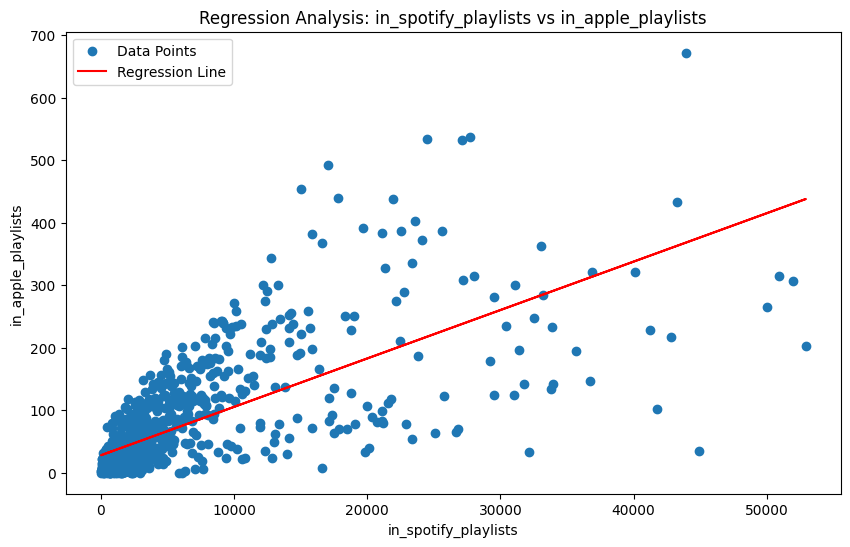

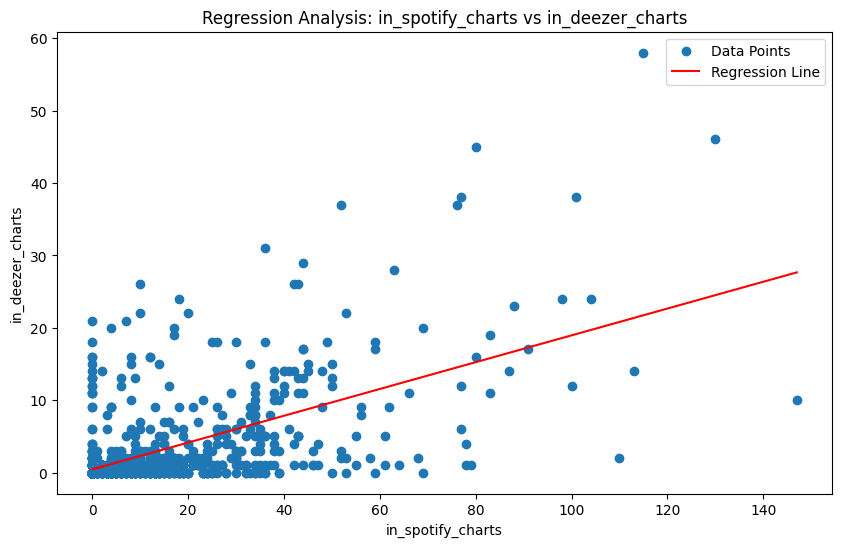

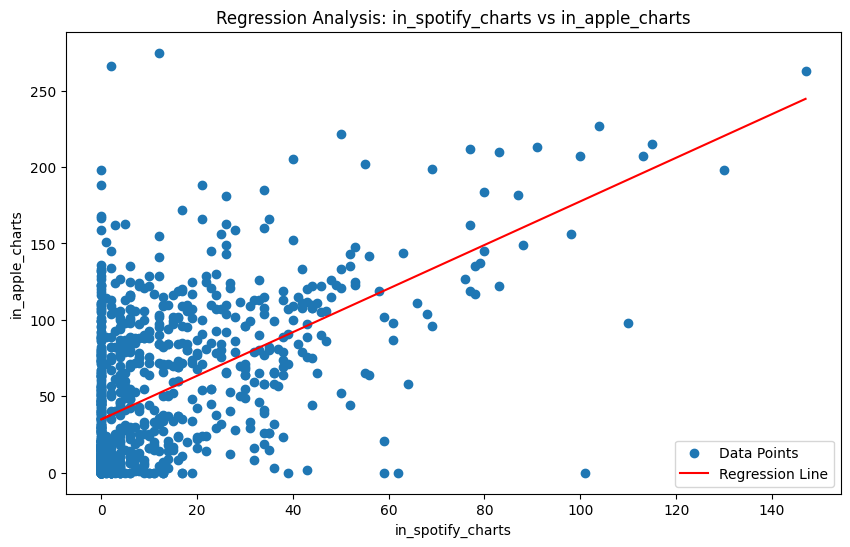

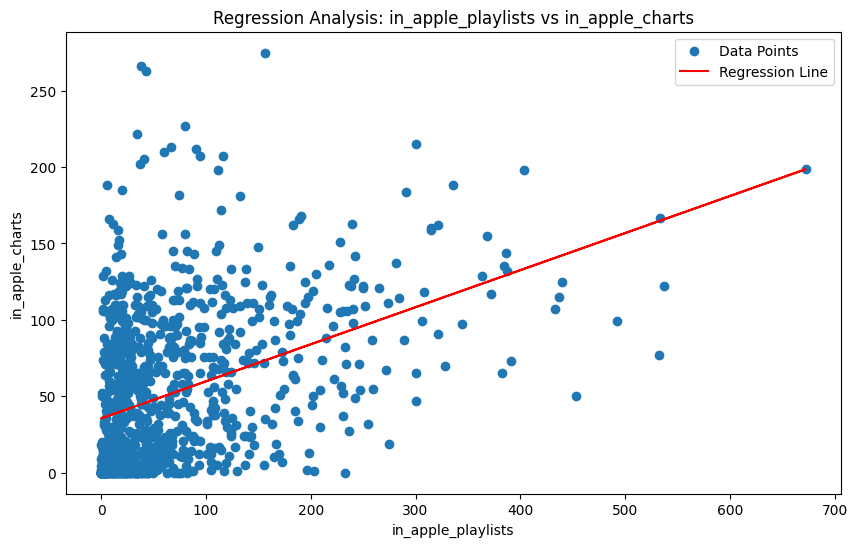

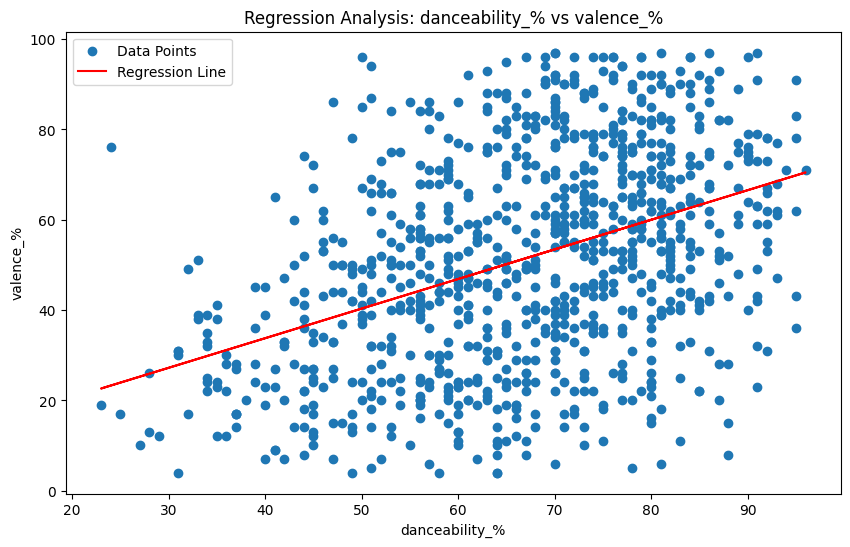

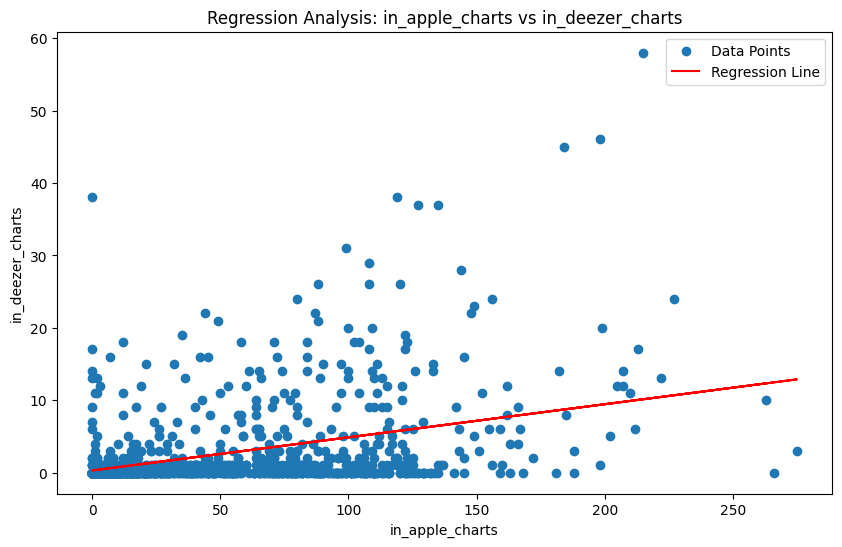

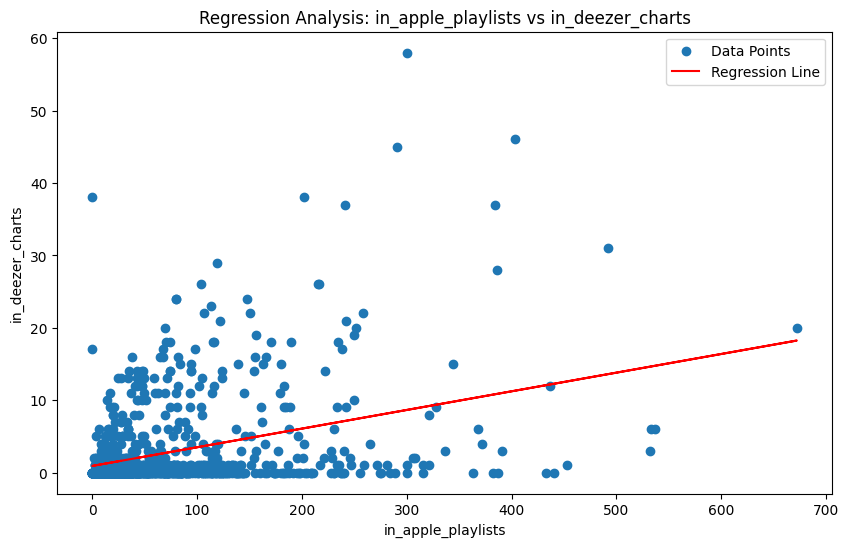

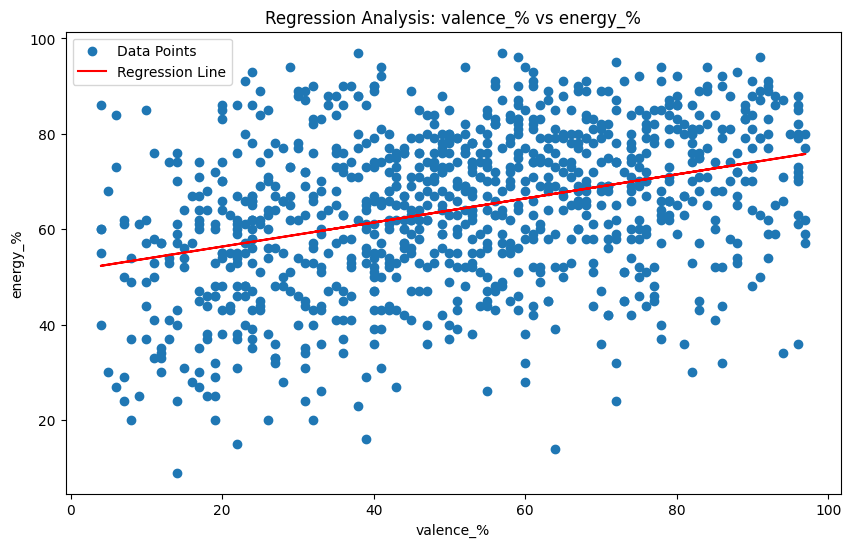

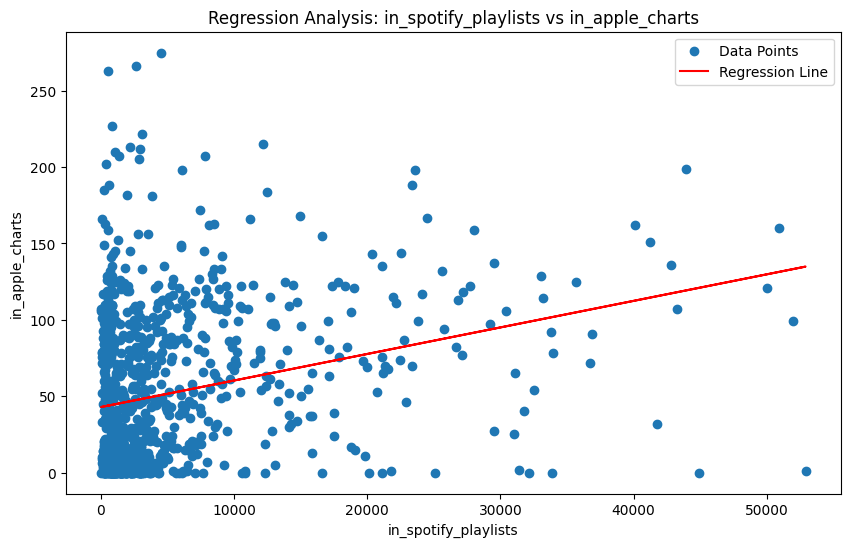

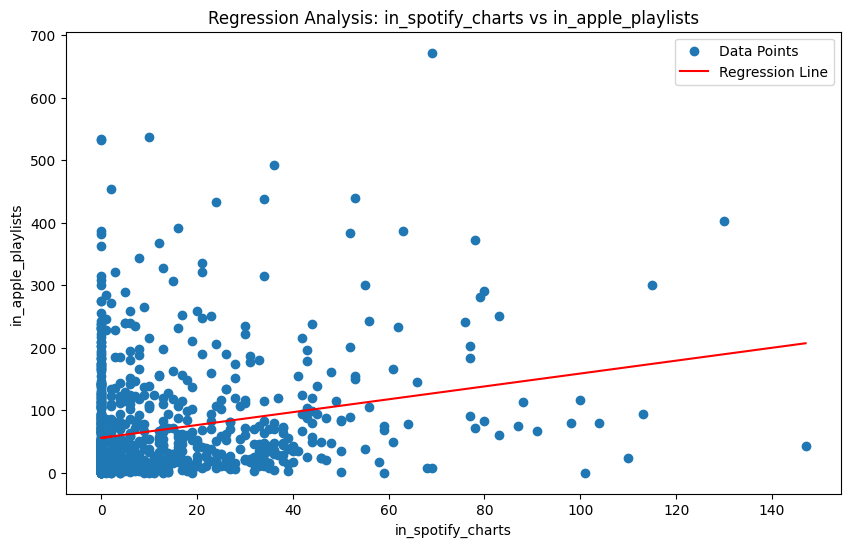

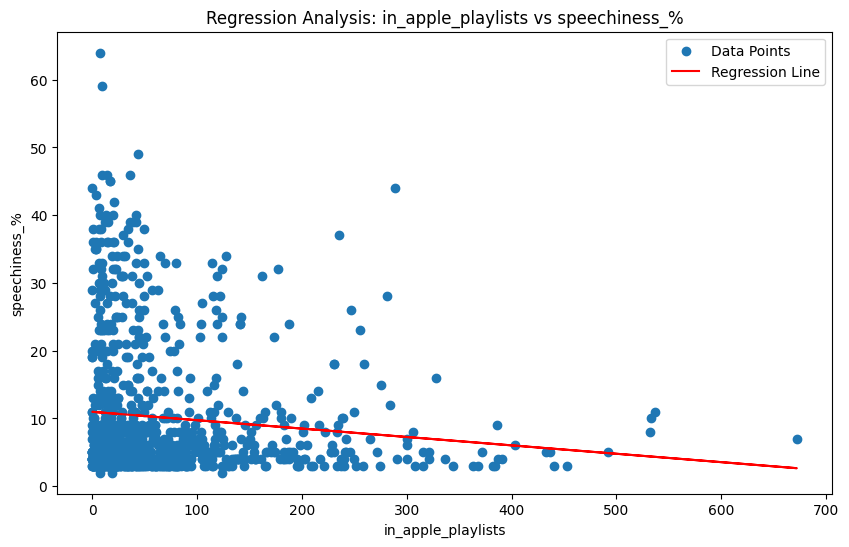

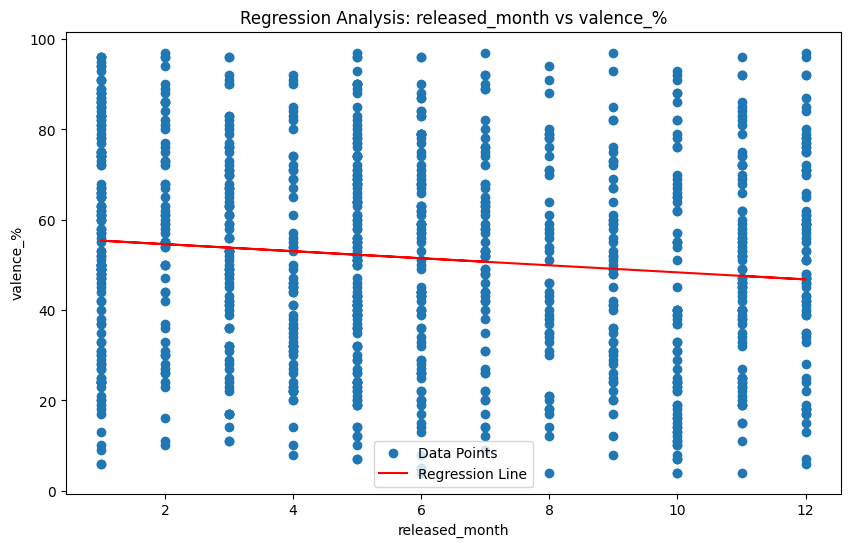

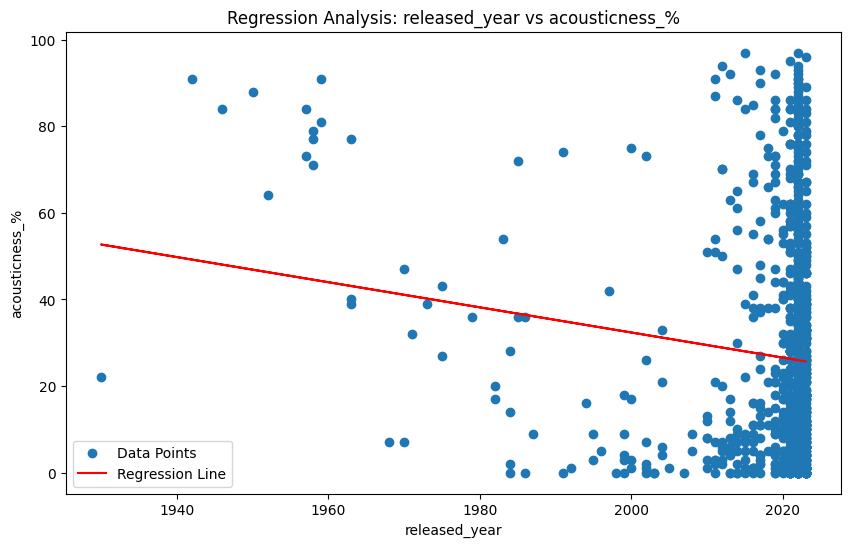

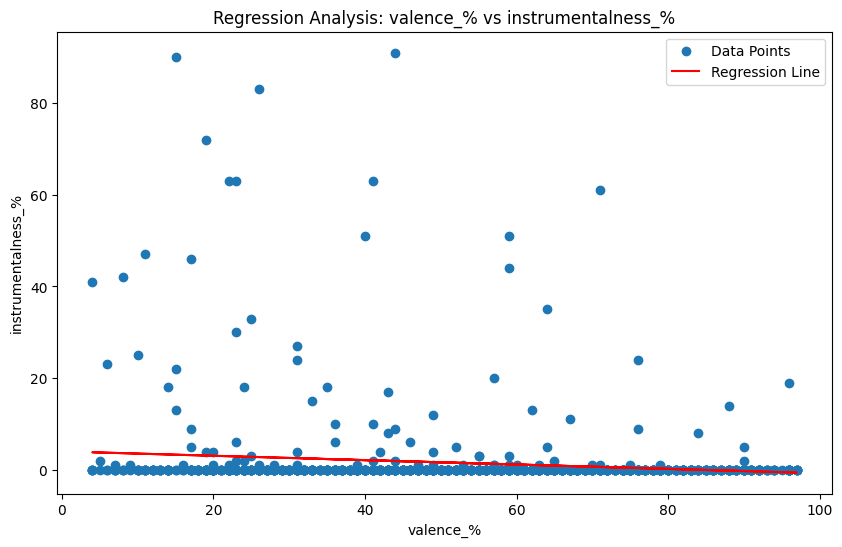

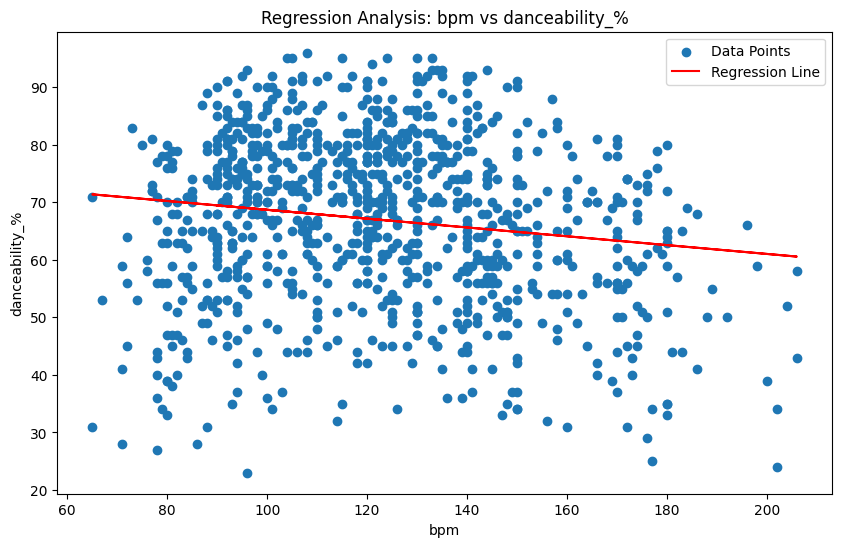

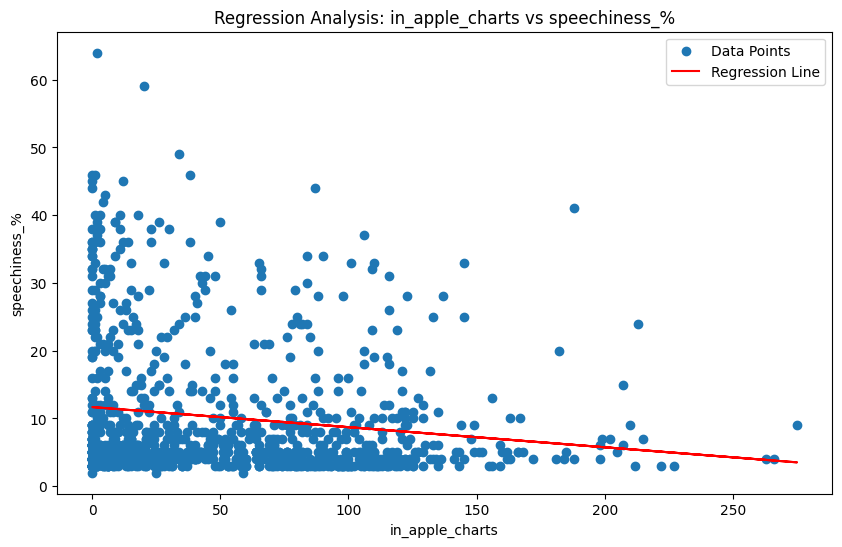

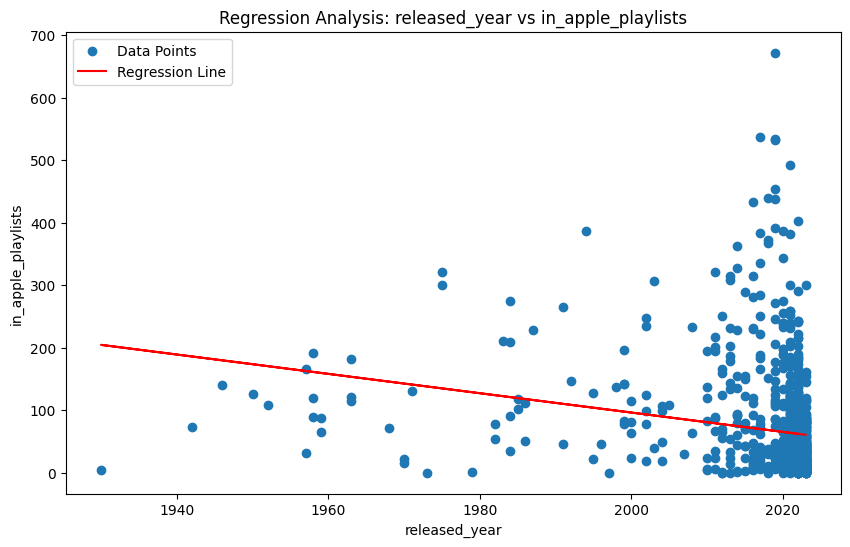

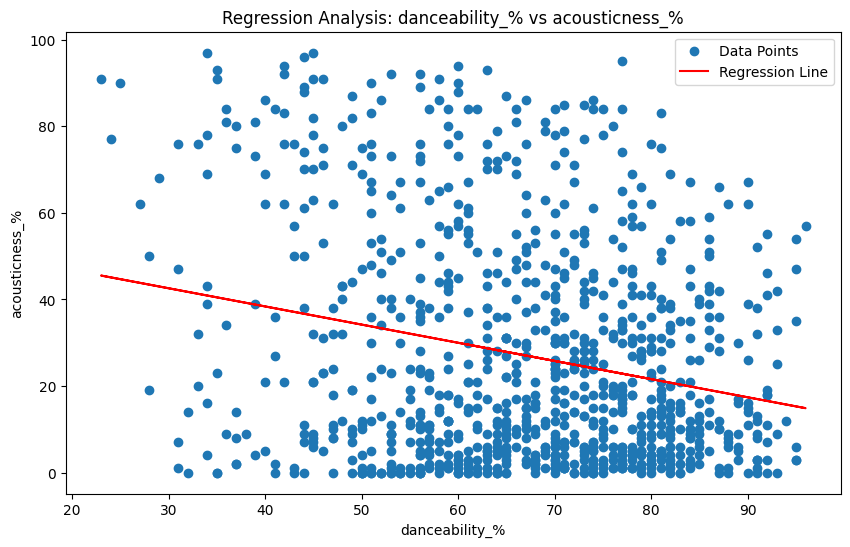

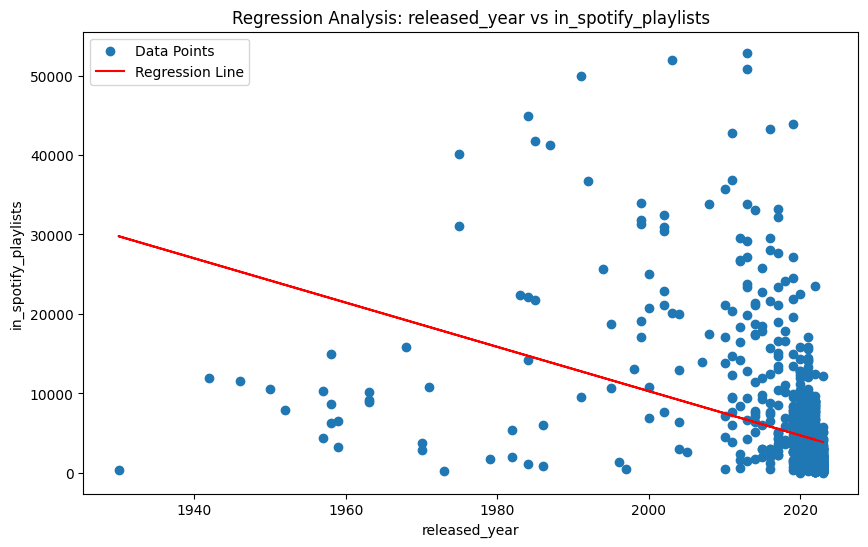

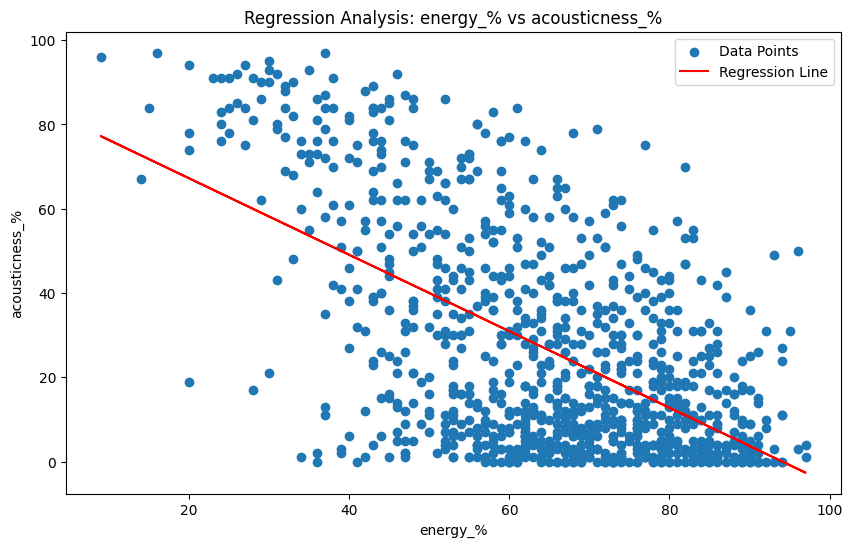

In [87]:
# Perform regression analysis on the best pairs

for (var2, var1) in to_analyze:
    X = data[[var1]]
    y = data[var2]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    # print(f"Regression analysis for {var1} and {var2}:")
    # print(model.summary())
    # print()

    # Plot the regression line and data points
    plt.figure(figsize=(10, 6))
    plt.scatter(data[var1], data[var2], label='Data Points')
    plt.plot(data[var1], model.predict(X), color='red', label='Regression Line')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Regression Analysis: {var1} vs {var2}')
    plt.legend()
    plt.show()